# Introducción al lenguaje Scala

## Origen
El nombre de Scala viene de "scalable language", ya que se diseñó para crecer a demanda del usuario. Funciona tanto para escribir tanto pequeños scripts como grandes aplicaciones.

Como lenguaje de programación Scala es un lenguaje multiparadigma que soporta la programación orientada a objetos y la programación funcional permitiendo mezclar ambos paradigmas en un mismo código.

Scala es un lenguaje compilado y fuertemente tipado, al contrario que lenguajes como python que son interpretados y con tipado dinámico.

Scala se ejecuta en la JVM (máquina virtual de Java) y es compatible con las aplicaciones Java.

Scaladoc : https://www.scala-lang.org/api/current/index.html

## Funcional
- **Funciones de orden superior**: Las funciones son solo un tipo por lo que pueden ser parámetros de entrada/salida para otras funciones
- **Funciones Puras**: El resultado solo depende de la entrada, por lo que siempre devuelve el mismo resultado con la misma entrada

In [ ]:
//Funciones de orden superior
def incremento(x: Int): Int = {
    return x+1
}
def dosVeces(x: Int, f: (Int) => Int) : Int = {
  return f(f(x))
}
dosVeces(2,incremento)

//Tambien se puede devolver una función
def generaF (x: Int) : (Int) => Int = {
    (b: Int) => x*b
}

In [ ]:
//Funcion pura
def incremento(x: Int): Int = {
    return x+1
}
//Funcion impura
var inc : Int = 4
def incremento2(x: Int): Int = {
    return x+inc
}
val pura : Int = incremento(2)
val impura1 : Int = incremento2(2)
inc = 2
val impura2 : Int = incremento2(2)

## Orientado a Objetos
Permite la definición de clases como contenedores de atributos y métodos. No existen los tipos primitivos, cualquier valor es un objeto

In [ ]:
5 + 8 * 2

5.+(8.*(2))

## Aspectos de Scala
- **Funciona sobre JVM**: Puede llamar métodos y heredar clases de Java. Tiene tiempos de ejecución muy similares a los de Java
- **Scala es conciso**
- El símbolo de final de línea ";" es opcional
- En las funciones y definición de variables, devuelve el ultimo valor de la línea (return es opcional)

In [ ]:
//Ejemplo de Scala
val control : Boolean = true
val valorControl : Int  = if (control) 1 else 0

## Variables
En Scala se define el tipo de las variables poniendo *: Tipo* después del nombre
- **Inferencia de tipos** : No hace falta definir los tipos de las variables
- **Tipos estáticos** : Se define el tipo en el momento de la compilación.
- **Val, Var y Lazy**: Valores inmutables y mutables

In [ ]:
//Inferencia
val cadena1 = "Hola"
val cadena2 : String = "a todos"

//Problemas con la infrencia de tipos
val entero = 2
val resultado = 3/entero 

In [ ]:
val decimal: Double = 2 //val decimal = 2.0
val resultado2 = 3/decimal

In [ ]:
//Tipos estaticos
var estatico = 1
estatico = "hola"

In [ ]:
//Var, Val
var variable = 1
variable = 2
val fijo = 3

In [ ]:
fijo=22

Las variables definidas como Lazy no se evalúan hasta que sean usadas la primera vez

In [ ]:
//Lazy
lazy val seraError = 1/0

In [ ]:
seraError

Cuando es bueno definir variables lazy
* Si una variable no se usa siempre y tiene un coste en computación, si se define como lazy nos ahorramos ese coste si no se usa.
* Para dependencia cíclicas, que pasaría si dos clases acceden a valores entre ellas....

In [ ]:
//Ejemplo de dependecias cruzadas
class Gallina(val name: String) {
    lazy val huevo = primero.primerHuevo.id
}
class Huevo(val id: Int) {
    lazy val gallina = primero.primeraGallina.name
}
object primero {
    val primerHuevo = new Huevo(1)
    val primeraGallina = new Gallina("Eva")
}
//primero.primerHuevo.gallina
//primero.primeraGallina.huevo

## Tipos Básicos
Tiene los mismos tipos básicos que en Java
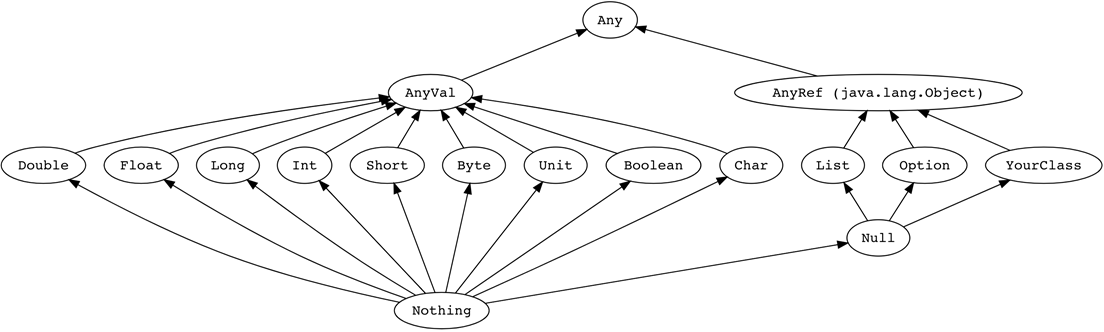

In [ ]:
val vBoolean: Boolean = false
val vChar: Char = 'h'
val vString: String = "Hola"
val vInt: Int = 2147483647 //-2147483648 to 2147483647
val vShort: Short = 32767 //-32768 to 32767
val vLong: Long = 9223372036854775807L // -9223372036854775808 to 9223372036854775807
val vFloat: Float = 2.0f //Float.MaxValue
val vDouble: Double = 3.14 //Double.MaxValue

### Interpolación de String
En Scala se puede insertar valores de variables dentro de una cadena, como si fuese una plantilla

In [ ]:
val mundo = "mundo"
val cadena = s"Hola $mundo"

Si hay que realizar alguna operación con las variables, hay que poner `{`

In [ ]:
val x = 2
val cadena = s"El cuadrado del numero es ${x*x}" 

También existen las triples comillas, se utilizan cuando la cadena tiene algún carácter especial

In [ ]:
val x = 2
val aaa = s""" $x $$ \\ ()
"a" 
"""

### Tipos Avanzados
- **Tuplas**: Se suelen utilizar para retornar mas de un valor de una función. Y contienen un número fijo de elementos. Desde 2 a 22 elementos
- **Option**: Es un tipo que puede llevar o no un valor. Puede estar de dos formas Some(X) o None, existen tipos de Scala que no aceptan el valor null.
- **Try**: Es un tipo que devuelve una ejecución y puede ser una excepción o un éxito. Puede tener dos valores Success(X) o Failure(X).

Con el '.' se puede acceder a las propiedades/métodos de los tipos.

In [ ]:
//Tuplas
val tupla = (11,22)
val trio = (1,"2",true)
// Se accede a la variable con _{posición}
tupla._1

In [ ]:
//Valores de Option
val algo : Option [String] = Some("a")
val nada : Option [String] = None

//Chequeo de Options
algo.isDefined
nada.isDefined

//Otros usos de Option
algo.map(_.toUpperCase)
nada.map(_.toUpperCase)

// Se obtiene la variable con .get, aunque si es un None da un fallo (getOrElse)
algo.get

In [ ]:
//Que pasaría si fuese null
val algo2 : String = "a"
val nada2 : String = null
algo2.toUpperCase
nada2.toUpperCase

In [ ]:
//Ejemplo de Try
import scala.util.{Try,Success,Failure}
val nada2 : String = null
val resultado = Try(nada2.toUpperCase)
resultado.isSuccess
resultado.isFailure

## Bloques
Los bloques de código vienen definidos en Scala por las llaves `{`. La última línea es lo que devuelve el bloque

In [ ]:
val y = 2
val x = {
    val z = 3
    (y*y)+z
}

## Array
   Es una estructura de datos de tamaño fijo de elementos del mismo tipo, el índice del primer elemento es 0
- :+ o +: Añade un elemento al array al principio o al final
- ++ Concatena dos arrays

In [ ]:
val primerArray = Array(1,2,3,4)
primerArray(2)
primerArray :+ 5
primerArray ++ primerArray
//primerArray(10)

val vacio = Array()
//vacio ++ primerArray

Otra característica de los arrays es que se pueden modificar (son mutable).

In [ ]:
val vacio = new Array[Int](5)
vacio(0) = 2

## Colecciones

### Listas
   Permite añadir o eliminar fácilmente elementos de la cabecera de la lista, pero para acceder a una posición debe recorrer todos los elementos de la lista
- head  Devuelve el primer elemento de la lista
- tail Devuelve una lista sin el primer elemento
- Nil lista vacía
- :: Añade un elemento al principio de la lista
- ::: Concatenación

In [ ]:
val primeraLista = List("Padre","Madre","Hermano","Hermano")
primeraLista(0)

//También es posible crear una lista con la concatenación de sus elementos
 "Primero" :: "Segundo" :: Nil

### Set
  Colección sin duplicados
- head  Devuelve el primer elemento del set
- tail Devuelve un set sin el primer elemento

In [ ]:
//Set
val primerSet = Set("Padre","Madre","Hermano","Padre")
primerSet
primerSet.head

### Map
  Colección con clave valor
- keys
- values
- get

In [ ]:
//Map
val primerMap = Map("primero"->2,"segundo"->18,"tercer"->22)
primerMap("primero")
primerMap.values

# Ejercicios

- Lanzar una ventana del Notebook de shell y ejecutar scala para acceder al REPL 
- Crear variables inmutables con vuestros nombres
- Crea una variable con vuestra edad y después añade uno a ese valor
- Crea una cadena interpolada *Hola me llamo [nombre] y tengo [edad]*
- Crea una colección con los centros de enseñanza donde has cursado (Primaria, Secundaria, Bachiller, Ciclo, Universidad y Master). La colección tiene que tener todos estos elementos aunque no tenga un valor